# アメリカボストンの住宅価格


## 1.単回帰直線を描く

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston =load_boston()

In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

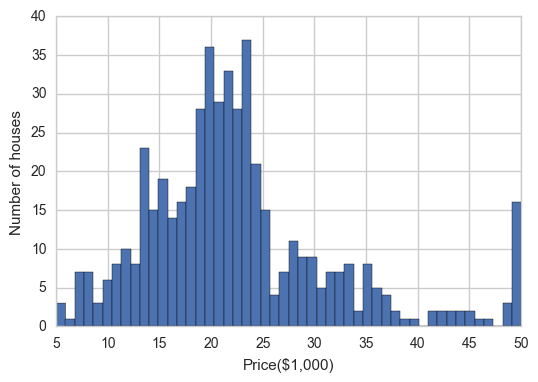

In [7]:
plt.hist(boston.target, bins=50)
plt.xlabel('Price($1,000)')
plt.ylabel('Number of houses')

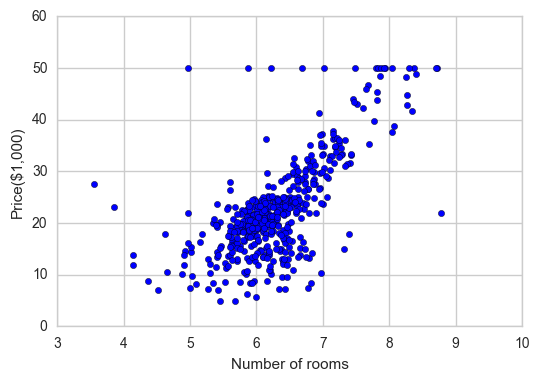

In [14]:
plt.scatter(boston.data[:,5],boston.target)
plt.ylabel('Price($1,000)')
plt.xlabel('Number of rooms')

#部屋の数が多いほど価格帯も高くなる

In [16]:
boston_df =DataFrame(boston.data)
boston_df.columns =boston.feature_names

In [17]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
boston_df['Price']=boston.target

In [19]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


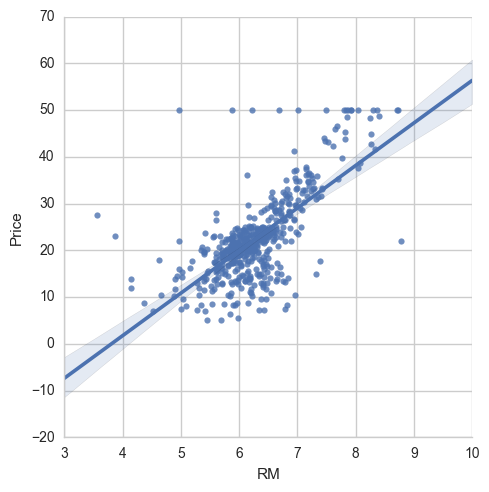

In [21]:
#回帰直線を描く

sns.lmplot('RM','Price',data=boston_df)

## 2. 直線の式を求めるために
###        最小二乗法を使う(Numpy)

In [23]:
X = boston_df.RM

In [25]:
#サンプル数
X.shape

(506,)

In [28]:
#計算のために二次元に変換
X =np.vstack(boston_df.RM)

In [29]:
X.shape

(506, 1)

In [30]:
X

array([[ 6.575],
       [ 6.421],
       [ 7.185],
       [ 6.998],
       [ 7.147],
       [ 6.43 ],
       [ 6.012],
       [ 6.172],
       [ 5.631],
       [ 6.004],
       [ 6.377],
       [ 6.009],
       [ 5.889],
       [ 5.949],
       [ 6.096],
       [ 5.834],
       [ 5.935],
       [ 5.99 ],
       [ 5.456],
       [ 5.727],
       [ 5.57 ],
       [ 5.965],
       [ 6.142],
       [ 5.813],
       [ 5.924],
       [ 5.599],
       [ 5.813],
       [ 6.047],
       [ 6.495],
       [ 6.674],
       [ 5.713],
       [ 6.072],
       [ 5.95 ],
       [ 5.701],
       [ 6.096],
       [ 5.933],
       [ 5.841],
       [ 5.85 ],
       [ 5.966],
       [ 6.595],
       [ 7.024],
       [ 6.77 ],
       [ 6.169],
       [ 6.211],
       [ 6.069],
       [ 5.682],
       [ 5.786],
       [ 6.03 ],
       [ 5.399],
       [ 5.602],
       [ 5.963],
       [ 6.115],
       [ 6.511],
       [ 5.998],
       [ 5.888],
       [ 7.249],
       [ 6.383],
       [ 6.816],
       [ 6.145

In [31]:
Y = boston_df.Price

In [33]:
#リスト内法表記

X=np.array([[value,1]for value in X])

In [35]:
#最小二乗法

a,b =np.linalg.lstsq(X,Y)[0]

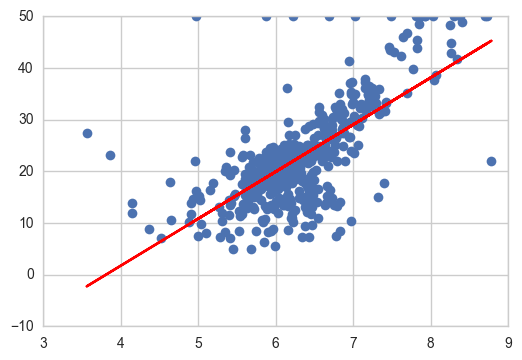

In [36]:
plt.plot(boston_df.RM,boston_df.Price,'o')
x=boston_df.RM
plt.plot(x,a*x+b,'r')

## 3. 誤差について考える

In [41]:
result =np.linalg.lstsq(X,Y)

In [44]:
error_total =result[1]
rmse = np.sqrt(error_total/len(X))

In [46]:
print('平均二乗誤差の平方根={:0.2f}'.format(rmse[0]))

平均二乗誤差の平方根=6.60


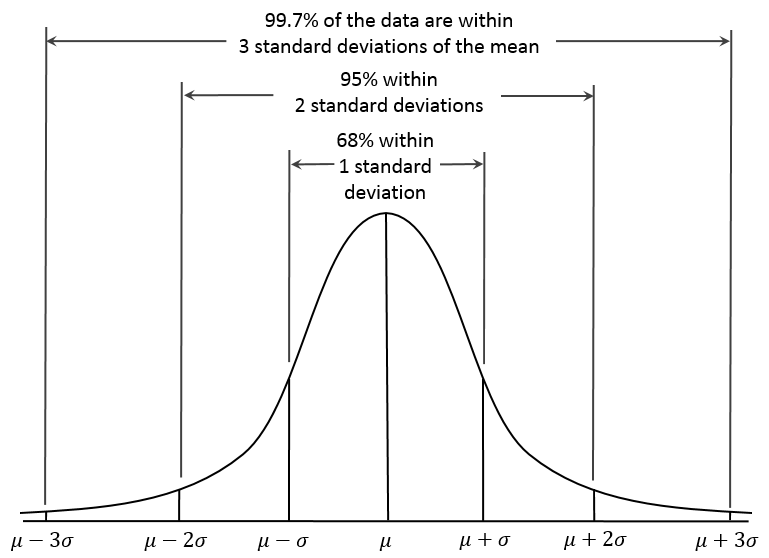

In [54]:
from IPython.display import Image
url = 'https://upload.wikimedia.org/wikipedia/commons/a/a9/Empirical_Rule.PNG'
Image(url)

## 4. scikit-learnを使った重回帰分析

### モデル作成編

In [56]:
import sklearn
from sklearn.linear_model import LinearRegression

<b>重要！</b><br>
lreg fit()   データをもとにモデルをつくる<br>
lreg.predict() 作られたモデルを元に予測値を返す<br>
Ireg.score()  決定係数を返す<br>

In [67]:
lreg=LinearRegression()

In [68]:
X_multi = boston_df.drop('Price',1)

In [69]:
X_multi.shape

(506, 13)

In [70]:
Y_target =boston_df.Price

In [71]:
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [76]:
#切片の値
lreg.intercept_

36.491103280363404

In [77]:
#係数の数
len(lreg.coef_)

13

In [78]:
coeff_df =DataFrame(boston_df.columns)

In [79]:
coeff_df.columns=['Features']

In [80]:
coeff_df['Coefficient Estimate']=pd.Series(lreg.coef_)

In [82]:
coeff_df

#RM(部屋の数)が住宅の価格に影響を与えていることがわかった

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


## 5. 住宅価格を予測する

In [108]:
#trainで予測、testで実際のデータとどれくらいズレているか比較
#サンプルの分け方はランダムに変わるので誤差も変わってくる

X_train, X_test,Y_train,Y_test =sklearn.cross_validation.train_test_split(X_multi,boston_df.Price)

In [109]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

#X 説明変数　Y　目的変数

(379, 13) (127, 13) (379,) (127,)


In [110]:
lreg =LinearRegression()

In [111]:
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [112]:
pred_train =lreg.predict(X_train)

In [113]:
pred_test =lreg.predict(X_test)

In [114]:
#誤差の計算
np.mean((Y_train - pred_train)**2)

21.2894985311656

In [115]:
np.mean((Y_test - pred_test)**2)

25.705375241694327

## 6. 残差プロット

残差　＝観測された値　- 予測された値

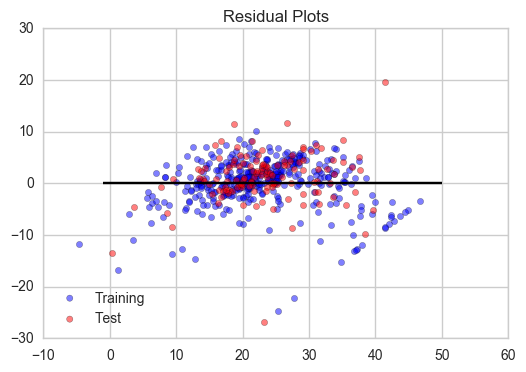

In [118]:
train =plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)
test  =plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)
plt.hlines(y=0,xmin=-1.0,xmax=50)

plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

y=0の横線に乗らないものができるだけ均一になっていることがよさげ<br>
採用したモデルがいいかどうかを確認